In [282]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

from statistics import mean

## Naver

### Data Implement

In [46]:
os.chdir('/Users/constant/Documents/Lecture/Data Science/Final Project/Data/SFn')
sf_n = pd.read_csv('SF_N.csv')

In [47]:
sfn = sf_n[['num', 'rating']]

In [48]:
result_n = []

for i in range(1,31):
    temp = sfn[sfn['num'] == i]
    temp_list = []
    for j in range(1,11):
        temptemp = temp[temp['rating'] == j]
        temp_list.append(len(temptemp))
    total_count = sum(temp_list)
    temp_list = list(map(lambda x:x/total_count, temp_list))
    temp_list.append(total_count)
    #temp_list.append(total_count)
    temp_list.insert(0, i)
    temp_list.append(round(temp['rating'].mean(), 2))
    result_n.append(temp_list)

In [49]:
result_n = pd.DataFrame(result_n)
result_n = result_n.rename(columns={0:'num', 11:'total_count', 12:'mean_rating'})

In [50]:
result_n.head()

,num,1,2,3,4,5,6,7,8,9,10,total_count,mean_rating
0,1,0.071724,0.023691,0.024343,0.032384,0.072376,0.096935,0.103890,0.116279,0.094327,0.364051,4601,7.41
1,2,0.069758,0.060766,0.010277,0.047919,0.017086,0.060509,0.029933,0.120889,0.060509,0.522354,7784,7.81
2,3,0.046892,0.008879,0.011931,0.016648,0.038013,0.054939,0.115705,0.163152,0.148446,0.395394,3604,8.09
3,4,0.058569,0.009501,0.010463,0.022129,0.031269,0.058088,0.072520,0.129405,0.130006,0.478052,8315,8.20
4,5,0.052438,0.007052,0.005551,0.010653,0.015154,0.026632,0.027307,0.047262,0.060390,0.747562,13330,8.95


## Watcha

### Data Implement

In [51]:
os.chdir('/Users/constant/Documents/Lecture/Data Science/Final Project/Data/SFw')
sf_w = pd.read_csv('SF_W.csv')

sf_w['rating'] = sf_w['rating']*2
##watcha is rated from 0 to 5, naver: 1~10

In [52]:
sfw = sf_w[['num', 'rating']]

In [53]:
result_w = []

for i in range(1,31):
    temp = sfw[sfw['num'] == i]
    temp_list = []
    for j in range(1,11):
        temptemp = temp[temp['rating'] == j]
        temp_list.append(len(temptemp))
    total_count = sum(temp_list)
    temp_list = list(map(lambda x:x/total_count, temp_list))
    temp_list.append(total_count)
    #temp_list.append(total_count)
    temp_list.insert(0, i)
    temp_list.append(round(temp['rating'].mean(), 2))
    result_w.append(temp_list)

In [54]:
result_w = pd.DataFrame(result_w)
result_w = result_w.rename(columns={0:'num', 11:'total_count', 12:'mean_rating'})

In [55]:
result_w.head()

,num,1,2,3,4,5,6,7,8,9,10,total_count,mean_rating
0,1,0.018732,0.031309,0.044688,0.142360,0.151726,0.229328,0.150388,0.132727,0.039336,0.059406,3737,5.98
1,2,0.027569,0.037240,0.052973,0.121969,0.190242,0.246680,0.184036,0.103204,0.021074,0.015012,6928,5.63
2,3,0.015957,0.031915,0.041033,0.095745,0.111702,0.258359,0.183131,0.194529,0.031155,0.036474,1316,6.18
3,4,0.009674,0.019347,0.027811,0.085852,0.153567,0.282950,0.194680,0.182588,0.018138,0.025393,827,6.18
4,5,0.009192,0.012908,0.011148,0.036965,0.038920,0.121651,0.133385,0.239194,0.169177,0.227459,5113,7.79


## Visualizing

In [283]:
print(mpl.matplotlib_fname())

/Users/constant/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

In [286]:
from matplotlib import font_manager, rc
font_path = '/Users/constant/Library/Fonts/NanumSquareRegular.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [287]:
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = '/Users/constant/Library/Fonts/NanumSquareRegular.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

#### 개별 영화 비교

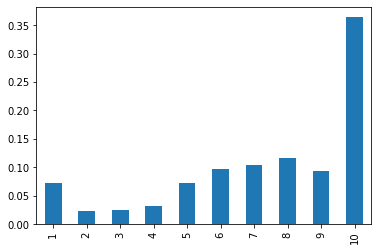

In [95]:
#histogram of SF1.naver
result_n.iloc[0,1:11].plot.bar()

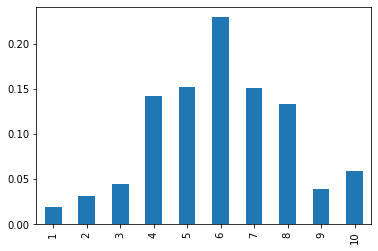

In [98]:
#histogram of SF1.naver
result_w.iloc[0,1:11].plot.bar()

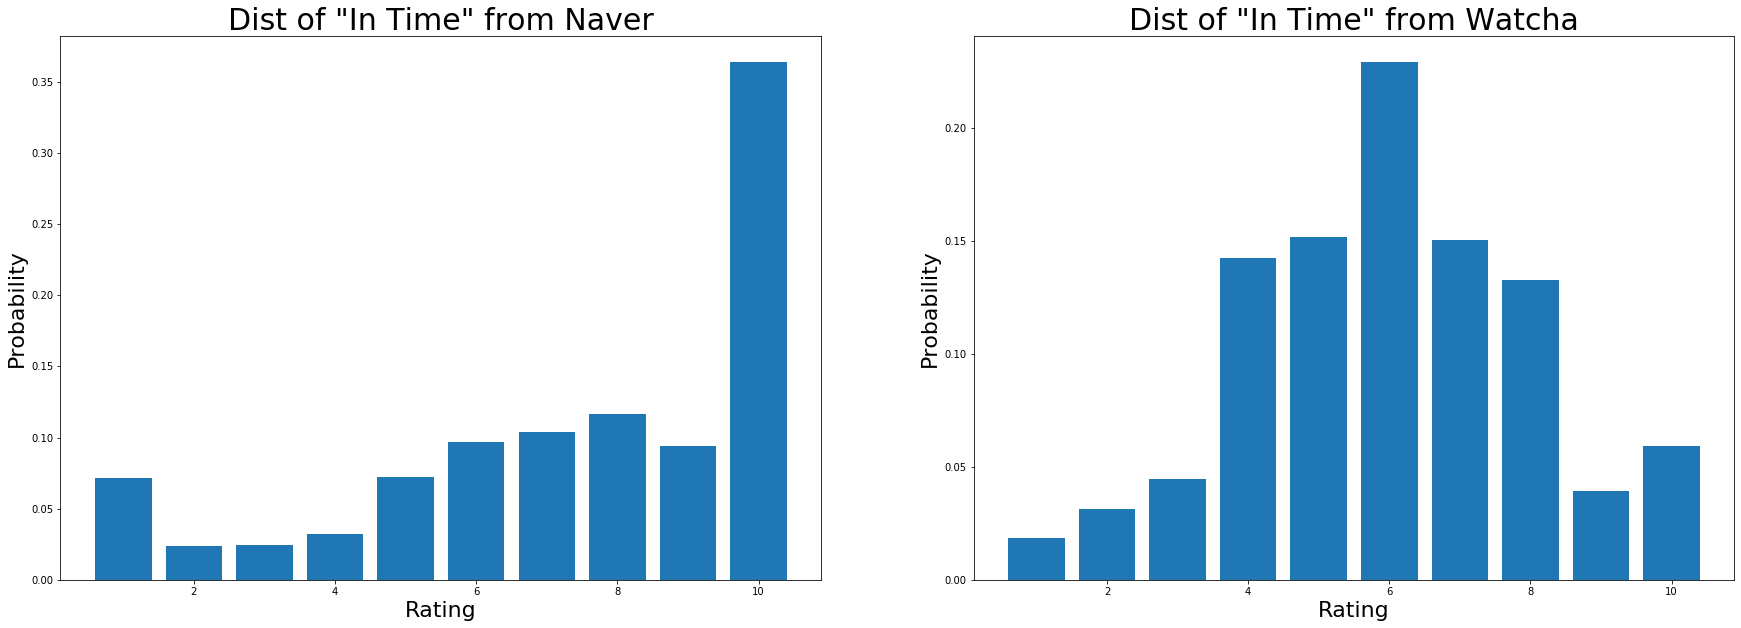

In [145]:
##Histroam of SF1(In Time)
f, axes = plt.subplots(1,2, figsize=(30, 10))
temp_x = [x+y for x,y in zip(list(range(10)), [1]*10)]

axes[0].bar(temp_x, result_n.iloc[0,1:11])
axes[0].set_title('Dist of "In Time" from Naver', fontsize = 30)
axes[0].set_xlabel('Rating', fontsize = 22)
axes[0].set_ylabel('Probability', fontsize = 22)

axes[1].bar(temp_x, result_w.iloc[0,1:11])
axes[1].set_title('Dist of "In Time" from Watcha', fontsize = 30)
axes[1].set_xlabel('Rating', fontsize = 22)
axes[1].set_ylabel('Probability', fontsize = 22)

plt.show()

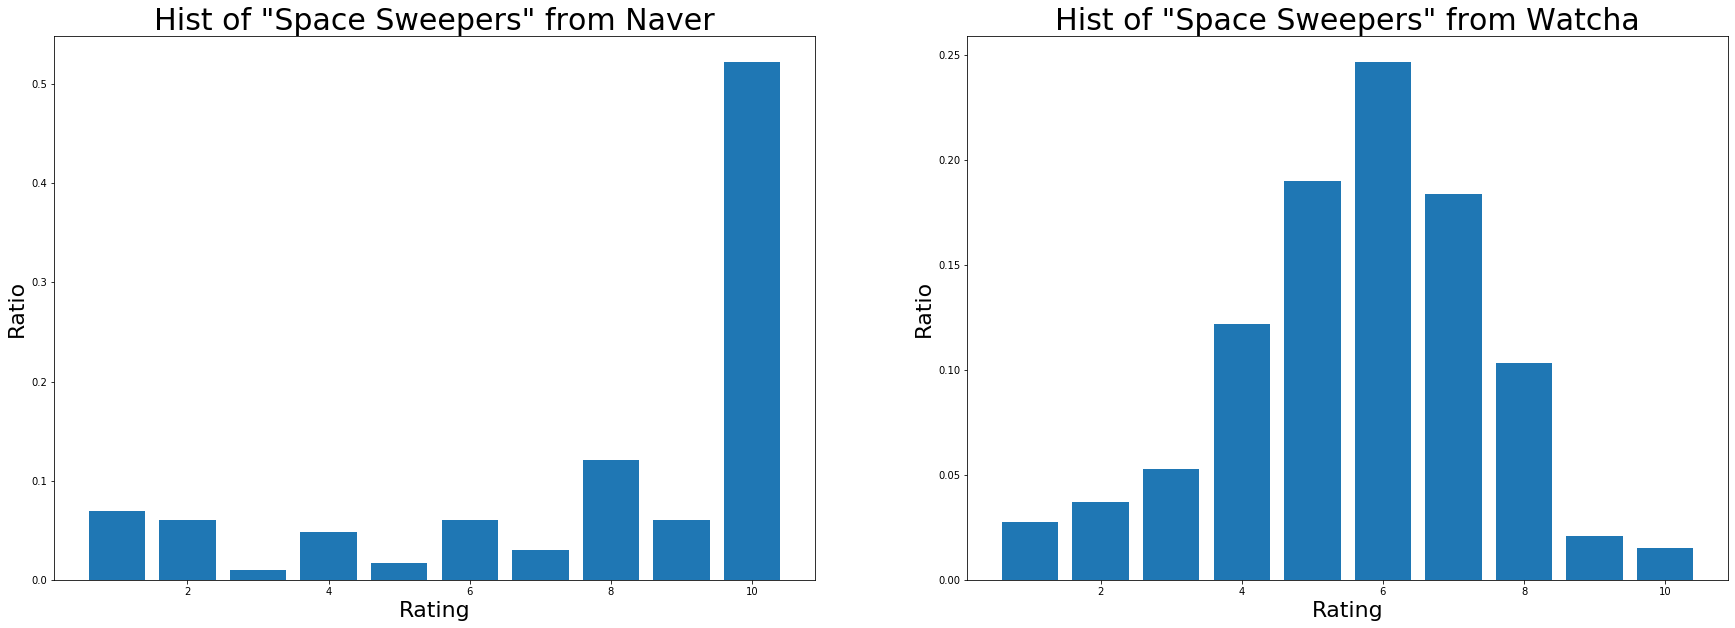

In [290]:
##Histroam of SF1(승리호)
f, axes = plt.subplots(1,2, figsize=(30, 10))
temp_x = [x+y for x,y in zip(list(range(10)), [1]*10)]

axes[0].bar(temp_x, result_n.iloc[1,1:11])
axes[0].set_title('Hist of "Space Sweepers" from Naver', fontsize = 30)
axes[0].set_xlabel('Rating', fontsize = 22)
axes[0].set_ylabel('Ratio', fontsize = 22)

axes[1].bar(temp_x, result_w.iloc[1,1:11])
axes[1].set_title('Hist of "Space Sweepers" from Watcha', fontsize = 30)
axes[1].set_xlabel('Rating', fontsize = 22)
axes[1].set_ylabel('Ratio', fontsize = 22)

plt.show()

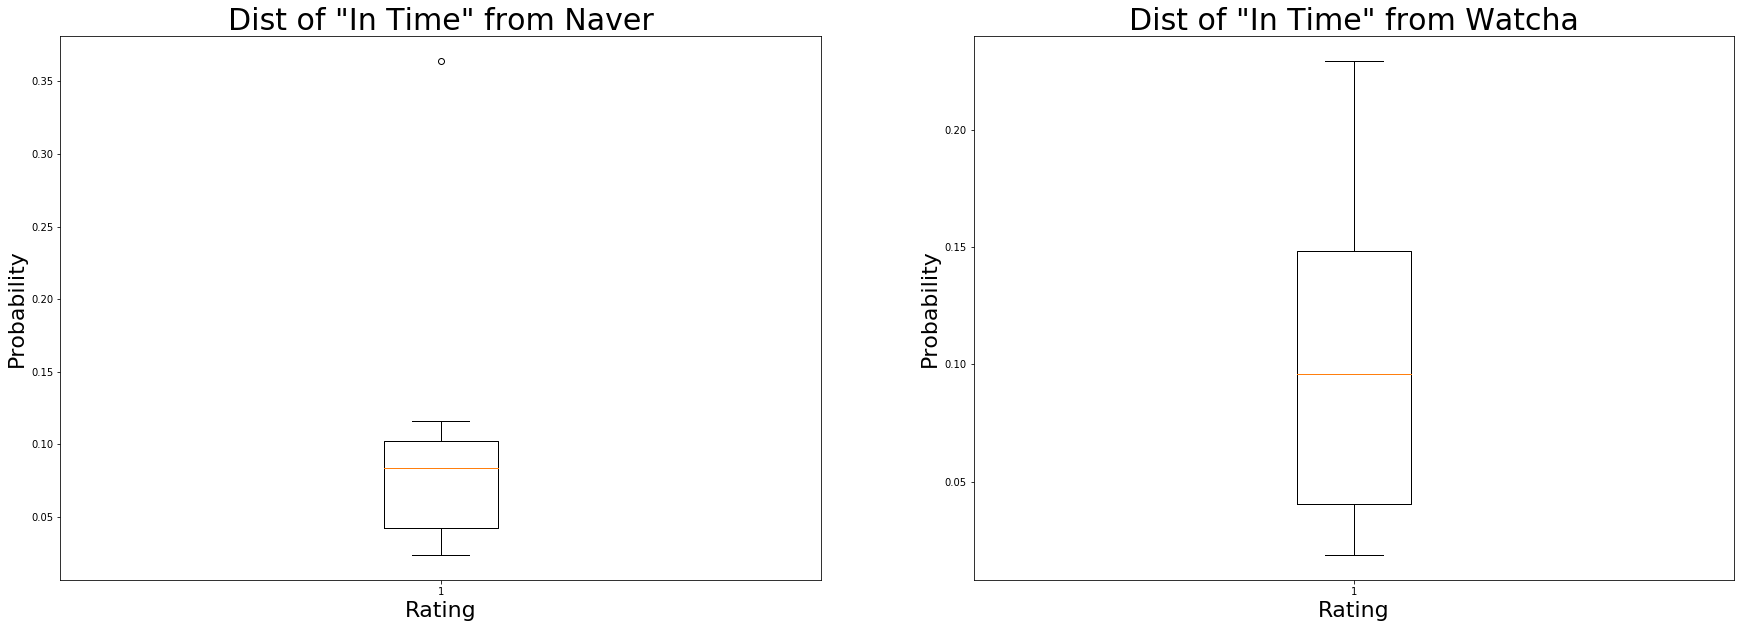

In [148]:
##Boxplot of SF1(In Time)
f, axes = plt.subplots(1,2, figsize=(30, 10))

axes[0].boxplot(result_n.iloc[0,1:11])
axes[0].set_title('Dist of "In Time" from Naver', fontsize = 30)
axes[0].set_xlabel('Rating', fontsize = 22)
axes[0].set_ylabel('Probability', fontsize = 22)

axes[1].boxplot(result_w.iloc[0,1:11])
axes[1].set_title('Dist of "In Time" from Watcha', fontsize = 30)
axes[1].set_xlabel('Rating', fontsize = 22)
axes[1].set_ylabel('Probability', fontsize = 22)

plt.show()

In [ ]:
##Total mean of SF
ttl_m_n = mean(result_n.iloc[:, -1])
ttl_m_w = mean(result_w.iloc[:, -1])
m = {'Naver': [ttl_m_n], 'Watcha': [ttl_m_w]}

ttl_m = pd.DataFrame(data=m)

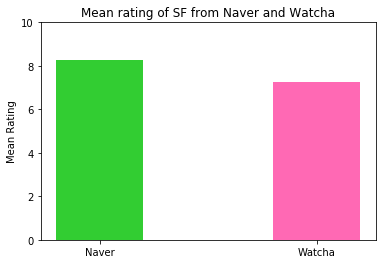

In [292]:
##Histogram of Total mean of SF
temp_x = list(range(2))

xlabel = ['Naver', 'Watcha']
plt.title('Mean rating of SF from Naver and Watcha')
plt.bar(temp_x, ttl_m.iloc[0], width=0.4, color=['limegreen','hotpink'])
plt.xticks(temp_x, xlabel)
#plt.xlabel('SF')
plt.ylabel('Mean Rating')
plt.ylim(0,10)



plt.show()

In [243]:
ttl_m.iloc[0]

Naver     8.291333
Watcha    7.255667
Name: 0, dtype: float64

In [239]:
temp_x

[0, 1]

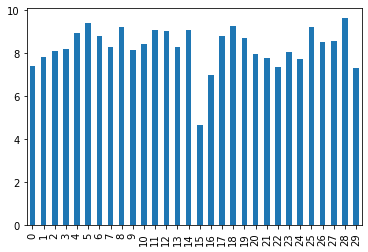

In [62]:
result_n['mean_rating'].plot.bar()

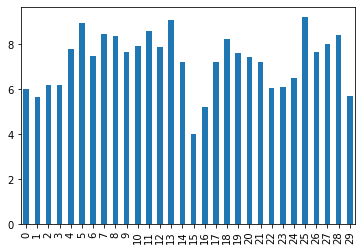

In [63]:
result_w['mean_rating'].plot.bar()

#### KS test

In [174]:
##Cumulative value of each data

###Naver
score_n = result_n.iloc[:,1:11]
cum_score_n = result_n.iloc[:,1:11].cumsum(axis=1)

###Watcha
score_w = result_w.iloc[:,1:11]
cum_score_w = result_w.iloc[:,1:11].cumsum(axis=1)

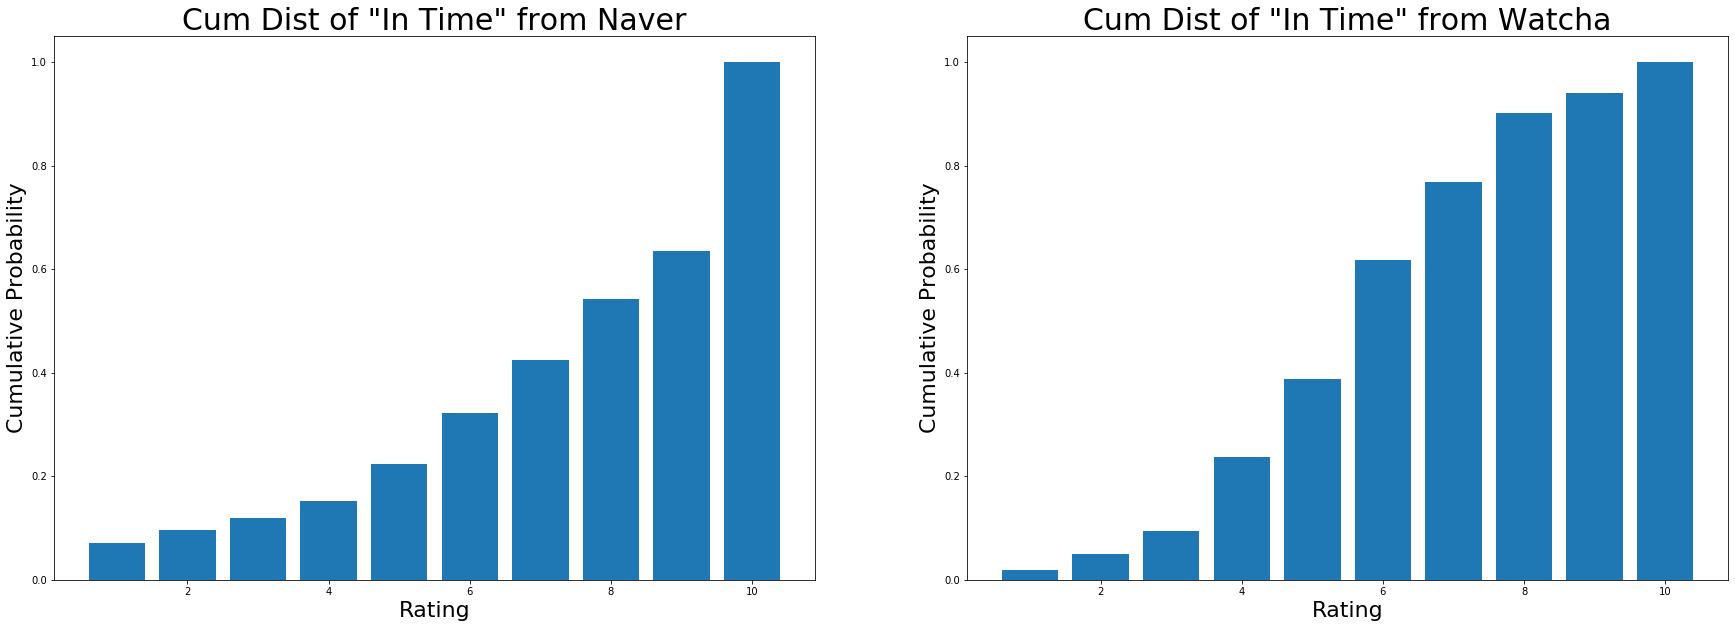

In [175]:
##Cumulative histroam of SF1(In Time)
f, axes = plt.subplots(1,2, figsize=(30, 10))
temp_x = [x+y for x,y in zip(list(range(10)), [1]*10)]

axes[0].bar(temp_x, cum_score_n.iloc[0,0:11])
axes[0].set_title('Cum Dist of "In Time" from Naver', fontsize = 30)
axes[0].set_xlabel('Rating', fontsize = 22)
axes[0].set_ylabel('Cumulative Probability', fontsize = 22)

axes[1].bar(temp_x, cum_score_w.iloc[0,0:11])
axes[1].set_title('Cum Dist of "In Time" from Watcha', fontsize = 30)
axes[1].set_xlabel('Rating', fontsize = 22)
axes[1].set_ylabel('Cumulative Probability', fontsize = 22)

plt.show()

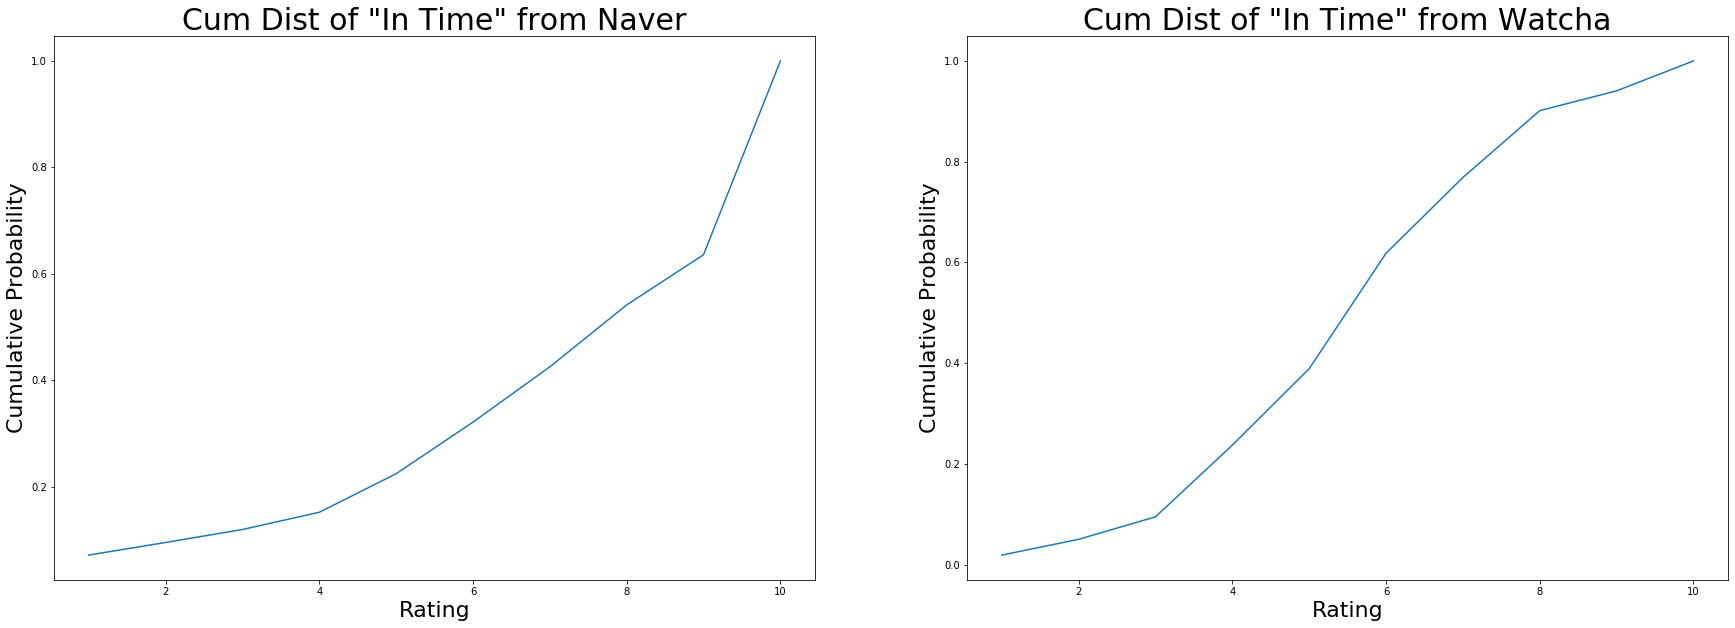

In [177]:
##Cumulative plot of SF1(In Time)
f, axes = plt.subplots(1,2, figsize=(30, 10))
temp_x = [x+y for x,y in zip(list(range(10)), [1]*10)]

axes[0].plot(temp_x, cum_score_n.iloc[0,0:11])
axes[0].set_title('Cum Dist of "In Time" from Naver', fontsize = 30)
axes[0].set_xlabel('Rating', fontsize = 22)
axes[0].set_ylabel('Cumulative Probability', fontsize = 22)

axes[1].plot(temp_x, cum_score_w.iloc[0,0:11])
axes[1].set_title('Cum Dist of "In Time" from Watcha', fontsize = 30)
axes[1].set_xlabel('Rating', fontsize = 22)
axes[1].set_ylabel('Cumulative Probability', fontsize = 22)

plt.show()

In [187]:
k = np.argmax(np.abs(cum_score_n.iloc[0,0:] - cum_score_w.iloc[0,0:]))
ks_stat = np.abs(cum_score_n.iloc[0,k] - cum_score_w.iloc[0,k])

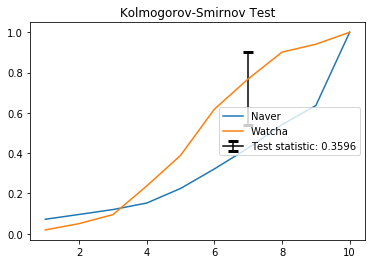

In [192]:
y = (cum_score_n.iloc[0,k] + cum_score_w.iloc[0,k])/2
plt.plot(temp_x, cum_score_n.iloc[0,0:], label='Naver')
plt.plot(temp_x, cum_score_w.iloc[0,0:], label='Watcha')
plt.errorbar(x=k, y=y, yerr=ks_stat/2, color='k',
             capsize=5, mew=3, label=f"Test statistic: {ks_stat:.4f}")
plt.legend(loc='center right');
plt.title("Kolmogorov-Smirnov Test");

In [205]:
from scipy.stats import kstest
from scipy.stats import ks_2samp

#stat, p_value = kstest(list(cum_score_n.iloc[0,0:]), list(cum_score_w.iloc[0,0:]))
stat, p_value = ks_2samp(cum_score_n.iloc[0,0:], cum_score_w.iloc[0,0:])

print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Kolmogorov-Smirnov Test: statistic=0.3000, p-value=0.7869


In [210]:
def ks_test(df1, df2):
    ks = []
    ks_p = []
    for i in range(30):
        stat, p_value = ks_2samp(
            cum_score_n.iloc[i, 0:], cum_score_w.iloc[i, 0:])
        ks.append(stat)
        ks_p.append(p_value)
    return ks, ks_p

In [218]:
ks_test(cum_score_n, cum_score_w)

([0.3,
  0.4,
  0.3,
  0.4,
  0.3,
  0.5,
  0.3,
  0.5,
  0.5,
  0.4,
  0.4,
  0.3,
  0.3,
  0.7,
  0.4,
  0.4,
  0.4,
  0.3,
  0.3,
  0.3,
  0.4,
  0.4,
  0.4,
  0.4,
  0.3,
  0.5,
  0.4,
  0.3,
  0.4,
  0.3],
 [0.7869297884777761,
  0.41752365281777043,
  0.7869297884777761,
  0.41752365281777043,
  0.7869297884777761,
  0.16782134274394334,
  0.7869297884777761,
  0.16782134274394334,
  0.16782134274394334,
  0.41752365281777043,
  0.41752365281777043,
  0.7869297884777761,
  0.7869297884777761,
  0.012340600575894691,
  0.41752365281777043,
  0.41752365281777043,
  0.41752365281777043,
  0.7869297884777761,
  0.7869297884777761,
  0.7869297884777761,
  0.41752365281777043,
  0.41752365281777043,
  0.41752365281777043,
  0.41752365281777043,
  0.7869297884777761,
  0.16782134274394334,
  0.41752365281777043,
  0.7869297884777761,
  0.41752365281777043,
  0.7869297884777761])